# Inverse Problems Exercises: 2024s s07 (non-sc)
https://www.umm.uni-heidelberg.de/miism/

## Notes
* Please **DO NOT** change the name of the `.ipynb` file. 
* Please **DO NOT** import extra packages to solve the tasks. 
* Please put the `.ipynb` file directly into the `.zip` archive without any intermediate folder. 

## Please provide your personal information
* full name (Name): 

Quang Minh, Ngo

## D04c: Gradient descent

In [342]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fminbound

In [343]:
file_gaussian = 'file_gaussian.npz'
with np.load(file_gaussian) as data:
    f_true = data['f_true']
    A_psf = data['A_psf']
    list_gn = data['list_gn']

### Imaging model
The imaging model can be represented by
$$
g = h \otimes f_\text{true}
= Af_\text{true}
= \mathcal{F}^{-1}\{ \mathcal{F}\{h\} \mathcal{F}\{f_\text{true}\} \},
$$
$$
g' = g + \epsilon.
$$
* $f_\text{true}$ is the input signal
* $h$ is the point spread function (kernel)
* $\otimes$ is the convolution operator
* $A$ is the Toeplitz matrix of $h$
* $\mathcal{F}$ and $\mathcal{F}^{-1}$ are the Fourier transform operator and inverse Fourier transform operator
* $\epsilon$ is the additive Gaussian noise
* $g$ is the filtered signal
* $g'$ is the noisy signal

### Mean squared error
Implement the mean squared error (MSE)
$$
\operatorname{MSE}(f)=\frac{1}{n}\sum_{i=1}^n(f_i - f_{\text{true}i})^2
$$
* Given the input signal $f$
* Given the true signal $f_\text{true}$
* Implement the function `mean_squared_error()` (using `numpy.array`)

In [344]:
def mean_squared_error(f, f_true):
    """ Compute the mean squared error comparing to the true signal:

    :param f: Input signal.
    :param f_true: True signal.
    :returns: Mean squared error.
    """
    return np.mean((f - f_true)**2)

In [345]:
# This cell contains hidden tests.


### Difference matrix
Implement the difference matrix $D_\text{diff}$
$$D_\text{diff} = \begin{bmatrix} 
1 & 0 & 0 & 0 & ... & 0 & -1 \\
-1 & 1 & 0 & 0 & ... & 0 & 0 \\
0 & -1 & 1 & 0 & ... & 0 & 0 \\
  &   &   & ... &   &   & \\
0 & 0 & 0 & 0 & ... & -1 & 1 \end{bmatrix}$$
* Given the size $n_\text{diff}$
* Implement the function `get_diff_matrix()` (using `numpy.array`)

In [346]:
def get_diff_matrix(n):
    """ Compute a matrix to calculate the difference along a vector of the size n
    between two neighboring elements.

    :param n: Size of the target vector.
    :returns: Matrix with shape (n, n), which calculates the difference.
    """
    matr = np.zeros((n, n))
    matr[0, 0] = 1
    matr[0, -1] = -1
    for i in range(1, n):
        matr[i, i] = 1
        matr[i, i-1] = -1
    return matr

In [347]:
# This cell contains hidden tests.


### Tikhonov regularization
Implement the objective function with Tikhonov regularization
$$
L(f) = \|Af - g'\|_2^2 + \lambda\|D'f\|_2^2
$$
* Given the input signal $f$
* Given the system matrix $A$
* Given the measurement $g'$
* Given the regularization matrix $D'$
* Given the regularization parameter $\lambda$
* Implement the function `objective_tikhonov()` (using `numpy.array`)

Implement the closed form solution of the regularized objective function
$$
\tilde f = (A^T A + \lambda D'^T D')^{-1} A^T g' = A_\lambda^{PI} g'
$$
* Given the system matrix $A$
* Given the measurement $g'$
* Given the regularization matrix $D'$
* Given the regularization parameter $\lambda$
* Implement the function `solution_tikhonov()` (using `numpy.array`)

In [348]:
import numpy.linalg as LA

def objective_tikhonov(f, A, g, D, lb):
    """ Compute the objective function with Tikhonov regularization.
    
    :param f: Current estimate of the signal.
    :param A: 2D matrix of the linear problem.
    :param g: Observed signal.
    :param D: 2D matrix in the regularization term.
    :param lb: Regularization parameter.
    :returns: Objective function value.
    """
    squared_normed_residual = LA.norm((np.dot(A, f) - g), 2)**2
    
    # Handeling the case when D is a zero matrix
    if np.all(D == 0):
        return squared_normed_residual
    
    squared_normed_regularization = LA.norm(np.dot(D, f), 2)**2
    return squared_normed_residual + lb * squared_normed_regularization
    
def solution_tikhonov(A, g, D, lb):
    """ Compute the estimate of the true signal with Tikhonov regularization.

    Use a regularization term to suppress noise.

    :param A: 2d matrix A of the linear problem.
    :param g: Observed signal.
    :param D: 2D matrix in the regularization term.
    :param lb: Regularization parameter.
    :returns: Estimate of the true signal.
    """
    # Handeling the case when D is a zero matrix
    if np.all(D == 0):
        return np.dot(LA.inv(np.dot(A.T, A)), np.dot(A.T, g))
    
    return np.dot(LA.inv(np.dot(A.T,  A) + lb * np.dot(D.T, D)), np.dot(A.T, g))

In [349]:
# This cell contains hidden tests.


In [350]:
# This cell contains hidden tests.


### Gradient magnitude solution
The gradient magnitude solution is the solution with $D' = D_\text{diff}$
* Calculate the closed form solution for the noisy signals in `list_gn`
* Return the outputs with $\lambda$ of $0.1$, $0.01$, $0.001$, respectively 
* Save the solutions in the variable `list_f_closed` (as `list` of `numpy.array`)
* Save the corresponding objective values in the variable `list_L_closed` (as `list` of scalars)

Display the result
* Plot the outputs in `list_f_closed` in the same order of the parameter options in the subplots of `axs`
* Show the cases of the same noisy signal in the same subplot column (outer loop)
* Show the cases with the same $\lambda$ in the same subplot row (inner loop)
* Plot the corresponding noisy signal in each subplot (after the filter output)
* Plot the input signal `f_true` in each subplot (after the noisy signal)
* Show the legend in each subplot
* Show the case information in the titles to the subplots
* Show the mean squared error of each output comparing to `f_true` in the titles to the subplots
* Show the objective function value of each output in the titles to the subplots

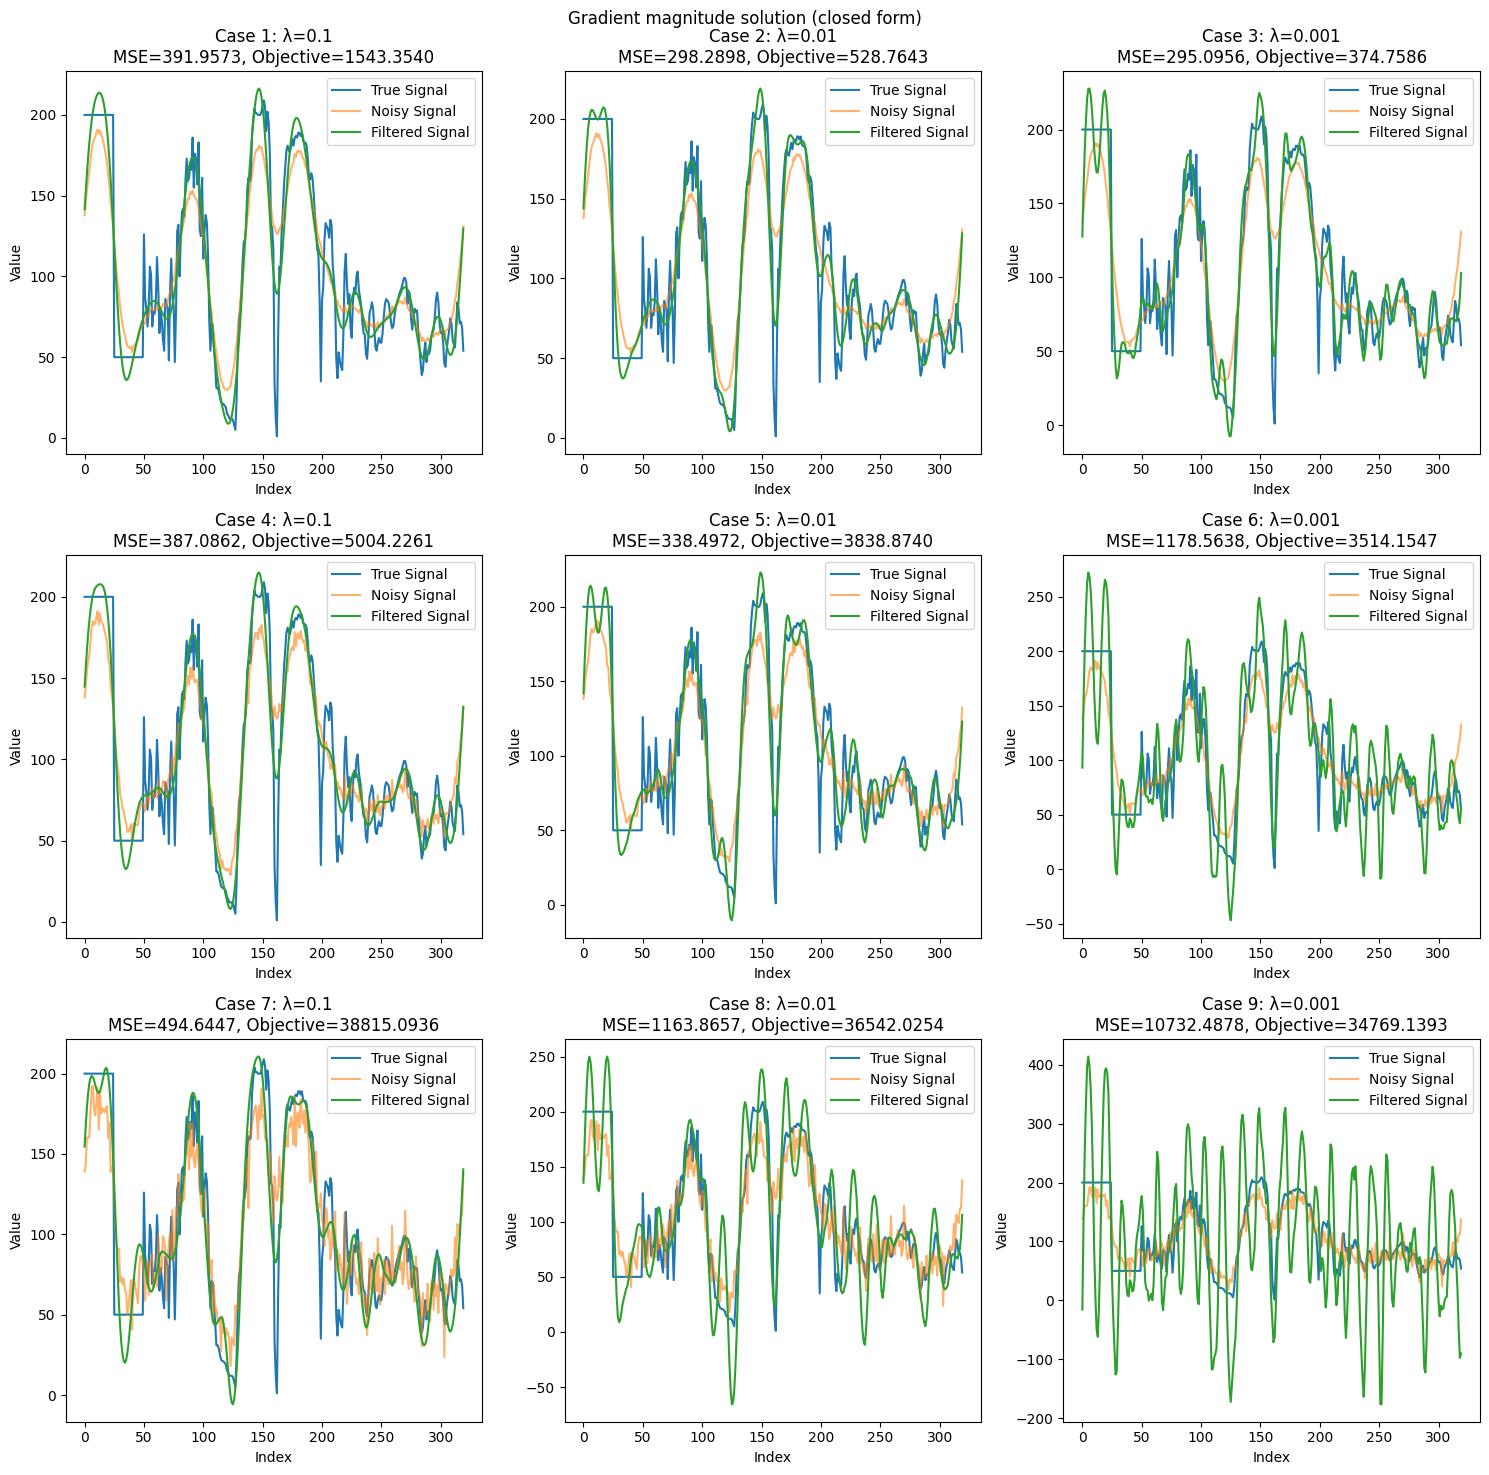

In [351]:
list_lb = [0.1, 0.01, 0.001]
list_f_closed = []
list_L_closed = []
D_diff = get_diff_matrix(A_psf.shape[1])
for lb in list_lb:
    list_f = []
    list_L = []
    for g in list_gn:
        f_closed = solution_tikhonov(A_psf, g, D_diff, lb)
        L_closed = objective_tikhonov(f_closed, A_psf, g, D_diff, lb)
        list_f.append(np.array(f_closed))
        list_L.append(np.array(L_closed))
    list_f_closed.append(np.array(list_f))
    list_L_closed.append(np.array(list_L))
    
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Gradient magnitude solution (closed form)')

for i, gn in enumerate(list_gn):
    for j, lambda_val in enumerate(list_lb):
        f_closed = list_f_closed[j][i]
        L_closed = list_L_closed[j][i]
        mse = mean_squared_error(f_closed, f_true)
        obj = objective_tikhonov(f_closed, A_psf, gn, D_diff, lambda_val)
        axs[i, j].plot(f_true, label='True Signal')
        axs[i, j].plot(gn, label='Noisy Signal', alpha=0.6)
        axs[i, j].plot(f_closed, label='Filtered Signal')
        axs[i, j].legend()
        axs[i, j].set_title(f"Case {i * 3 + j +1}: λ={lambda_val}\nMSE={mse:.4f}, Objective={obj:.4f}")
        axs[i, j].set_xlabel('Index')
        axs[i, j].set_ylabel('Value')
plt.tight_layout()
plt.show()

In [352]:
# This cell contains hidden tests.


### Gradient descent technique
Gradient descent is an optimization method to find an $f$, which minimize the objective function $L(f)$.
One iterative update is given by
$$
f^{(i+1)} = f^{(i)} - s_i \nabla L(f^{(i)}),
$$
where $s_i$ is the optimal step size of the one-dimensional optimization problem
$$
s_i = \arg\min_{s\in \mathbb{R}^+} L(f^{(i)} - s \nabla L(f^{(i)})).
$$

Implement the iterative gradient descent updates
* Given the objective function $L(f)$
* Given the gradient of the objective function $\nabla L(f)$
* Given the initial value $f^{(0)}$
* Given the number of iterations $n$
* Estimating the optimal step size $s_i$ in $[0, 10]$ (using ```scipy.optimize.fminbound()```)
* Return the final value $f^{(n)}$ as the first output
* Return the history array of objective values $[L(f^{(0)}), ..., L(f^{(n)})]$ as the second output
* Implement the function `solve_gradient_descent_ls()` (using `numpy.array`)

In [353]:
def solve_gradient_descent_ls(objective_function, gradient_function, f0, n):
    """ 
    :param objective_function: objective function of f.
    :param gradient_function: gradient of the objective function of f.
    :param f0: Starting values for initializing the parameters f.
    :param n: Number of iterative gradient updates.
    :returns: Final f and an array of n + 1 objective values in the optimization history.
    """
    objective_values = []
    for _ in range(n):
        # optimization history
        objective_values.append(np.array(objective_function(f0)))
        
        # gradient descent update
        grad_current = gradient_function(f0)
        
        # optimal step size
        si = fminbound(lambda s: objective_function(f0 - s * grad_current), 0, 10)
        
        # update f0
        f0 = f0 - si * grad_current
    
    # append the last objective value
    objective_values.append(np.array(objective_function(f0)))
    return f0, np.array(objective_values)

In [354]:
# This cell contains hidden tests.


In [355]:
# This cell contains hidden tests.


### Tikhonov regularization with gradient descent 
Implement the gradient of the objective function with Tikhonov regularization
$$
\nabla L(f) = 2 A^T (Af - g') + 2 \lambda D'^T D'f
$$
* Given the input signal $f$
* Given the system matrix $A$
* Given the measurement $g'$
* Given the regularization matrix $D'$
* Given the regularization parameter $\lambda$
* Implement the function `gradient_tikhonov()` (using `numpy.array`)

The gradient magnitude solution is the solution with $D' = D_\text{diff}$
* Calculate the solution by gradient descent for the noisy signals in `list_gn`
* Return the outputs with $\lambda$ of $0.1$, $0.01$, $0.001$, respectively, with $f^{(0)}=0$, $n=20$
* Save the solutions in the variable `list_f_gd` (as `list` of `numpy.array`)
* Save the corresponding objective value history in the variable `list_L_gd` (as `list` of `numpy.array`)

Display the result
* Plot the outputs in `list_f_gd` in the same order of the parameter options in the subplots of `axs`
* Show the cases of the same noisy signal in the same subplot column (outer loop)
* Show the cases with the same $\lambda$ in the same subplot row (inner loop)
* Plot the corresponding noisy signal in each subplot (after the filter output)
* Plot the input signal `f_true` in each subplot (after the noisy signal)
* Show the legend in each subplot
* Show the case information in the titles to the subplots
* Show the mean squared error of each output comparing to `f_true` in the titles to the subplots
* Show the objective function value of each output in the titles to the subplots

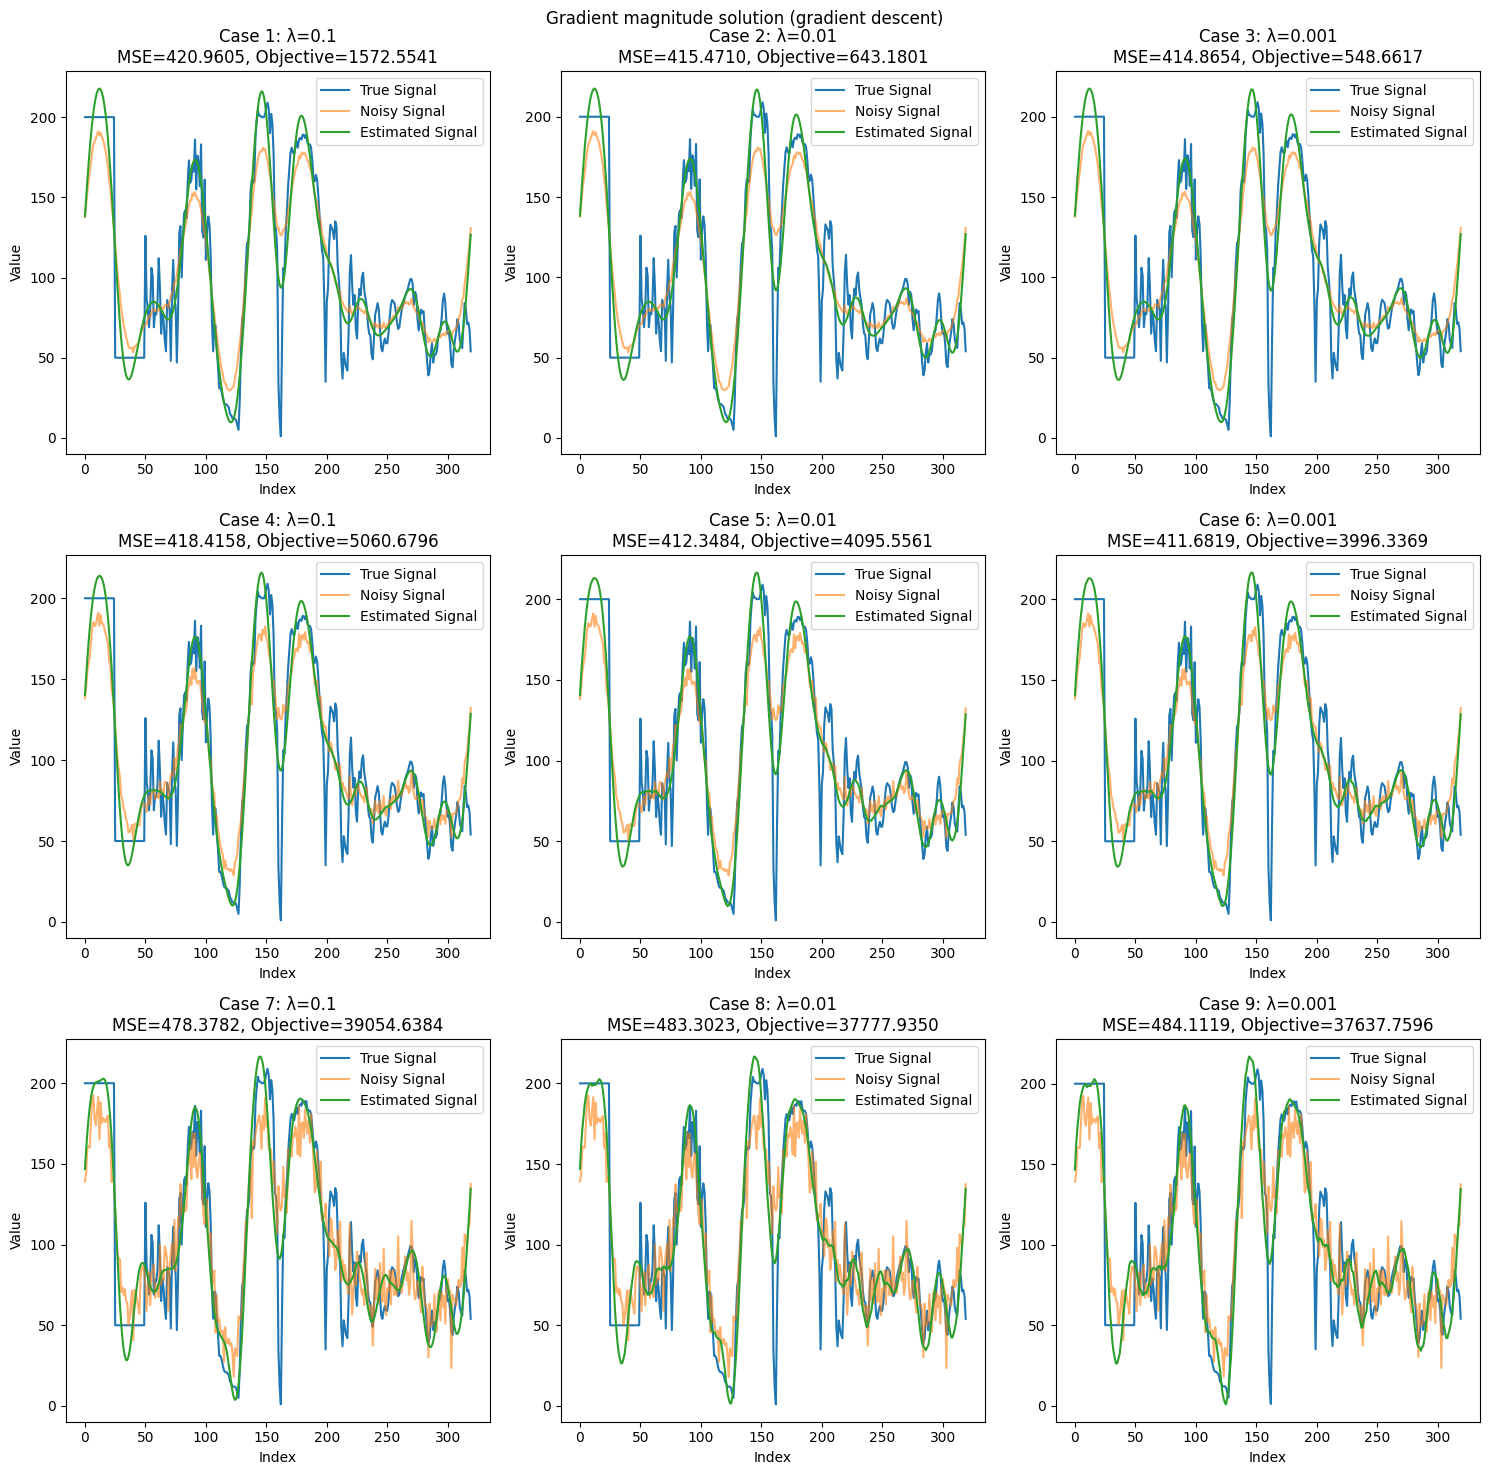

In [356]:
def gradient_tikhonov(f, A, g, D, lb):
    """ Compute the gradient of the objective function with Tikhonov regularization.
    
    :param f: Current estimate of the signal.
    :param A: 2D matrix of the linear problem.
    :param g: Observed signal.
    :param D: 2D matrix in the regularization term.
    :param lb: Regularization parameter.
    :returns: Gradient value of the objective function.
    """
    gradient_residual = 2 * np.dot(A.T, np.dot(A, f) - g)
    
    # Handeling the case when D is a zero matrix
    if np.all(D == 0):
        return gradient_residual
    
    gradient_regularization = 2 * lb * np.dot(D.T, np.dot(D, f))
    return gradient_residual + gradient_regularization


D = get_diff_matrix(A_psf.shape[1])
list_f_gd = []
list_L_gd = []
f0 = 0
n = 20
for lb in list_lb:
    list_f = []
    list_L = []
    for g in list_gn:
        f0 = np.zeros(A_psf.shape[1])
        f_gd, L_gd = solve_gradient_descent_ls(\
                    lambda f: objective_tikhonov(f, A_psf, g, D, lb),\
                    lambda f: gradient_tikhonov(f, A_psf, g, D, lb),\
                    f0, n)
        list_f.append(np.array(f_gd))
        list_L.append(np.array(L_gd))
    list_f_gd.append(np.array(list_f))
    list_L_gd.append(np.array(list_L))
                     
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Gradient magnitude solution (gradient descent)')
for i, gn in enumerate(list_gn):
    for j, lambda_val in enumerate(list_lb):
        f_gd = list_f_gd[j][i]
        mse = mean_squared_error(f_gd, f_true)
        obj = objective_tikhonov(f_gd, A_psf, gn, D, lambda_val)
        axs[i, j].plot(f_true, label='True Signal')
        axs[i, j].plot(gn, label='Noisy Signal', alpha=0.6)
        axs[i, j].plot(f_gd, label='Estimated Signal')
        axs[i, j].legend()
        axs[i, j].set_title(f"Case {i * 3 + j + 1}: λ={lambda_val}\nMSE={mse:.4f}, Objective={obj:.4f}")
        axs[i, j].set_xlabel('Index')
        axs[i, j].set_ylabel('Value')
plt.tight_layout()
plt.show()

In [357]:
# This cell contains hidden tests.


### Optimization history
Display the result
* Plot the arrays in `list_L_gd` as solid lines in the same order of the parameter options in the subplots of `axs`
* Plot the values in `list_L_closed` as horizontal dash lines in the same order of the parameter options in the subplots of `axs`
* Show the cases of the same noisy signal in the same subplots
* Make the subplots with log scaling on the y axis
* Show the legend in each subplot
* Show the case information in the titles to the subplots

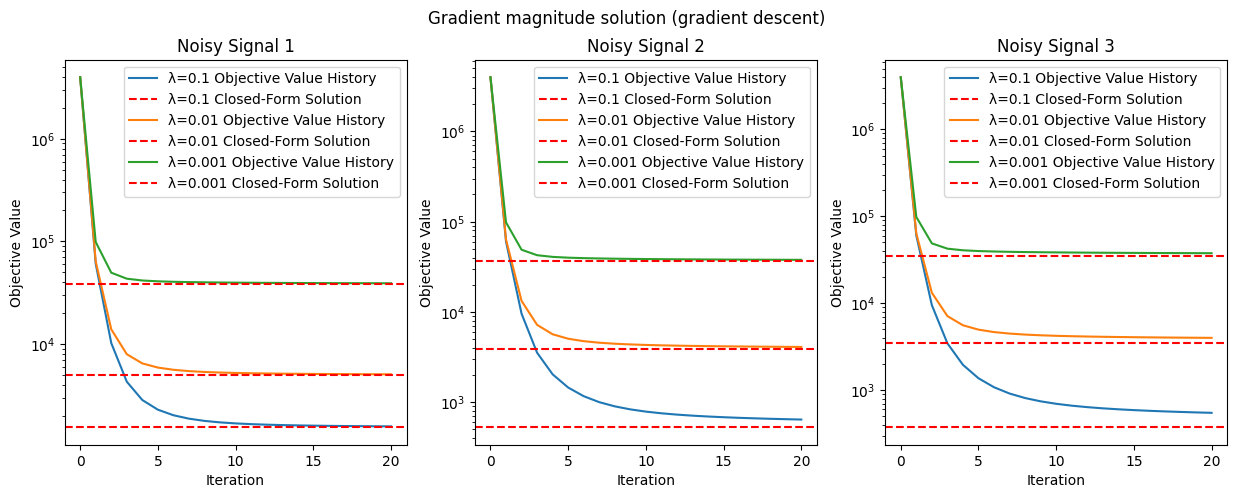

In [358]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Gradient magnitude solution (gradient descent)')

for j, g_prime in enumerate(list_gn):
    for i, lam in enumerate(list_lb):
        L_history = list_L_gd[j][i]
        L_closed = list_L_closed[j][i]
        
        axs[j].plot(L_history, label=f'λ={lam} Objective Value History')
        axs[j].axhline(y=L_closed, color='r', linestyle='--', label=f'λ={lam} Closed-Form Solution')
        axs[j].set_yscale('log')
    
    axs[j].legend()
    axs[j].set_title(f"Noisy Signal {j + 1}")
    axs[j].set_xlabel('Iteration')
    axs[j].set_ylabel('Objective Value')

plt.show()

### Total variation
The objective function with total variation is
$$
L(f) = \|Af - g\|_2^2 + \lambda\|\nabla f\|_1
$$
The gradient of the objective function with total variation is
$$
\nabla L(f) 
\approx 2 A^T (Af - g) + \lambda \nabla \sum_{j=1}^{n} \sqrt{(f_j - f_{j-1})^2 + \beta^2}
= 2 A^T (Af - g) + \lambda \begin{bmatrix} 
r_1 \\
... \\
r_i \\
... \\
r_n \end{bmatrix},
$$
where $1 \gg \beta^2 > 0$ and

$$
r_i = \frac{f_i - f_{i-1}}{\sqrt{(f_i - f_{i-1})^2 + \beta^2}}
- \frac{f_{i+1} - f_{i}}{\sqrt{(f_{i+1} - f_{i})^2 + \beta^2}}
$$

with $f_{-1} = 0$ and $f_{n} = 0$.

* Given the input signal $f$
* Given the system matrix $A$
* Given the measurement $g'$
* Given the regularization parameter $\lambda$
* Implement the objective function `objective_tv()` (using `numpy.array`)
  - Note, $\nabla f$ can be calculated by $D_\text{diff} f$
* Implement the gradient of the objective function with $\beta^2 = 0.001$ `gradient_tv()` (using `numpy.array`)

In [359]:
def objective_tv(f, A, g, lb):
    """ 
    :param f: Current estimate of the signal.
    :param A: 2d Matrix A of the linear problem.
    :param g: Observed signal.
    :param lb: Regularization strength of TV.
    :returns: Objective function value.
    """
    return np.mean((np.dot(A, f) - g)**2) + lb * np.linalg.norm(np.dot(get_diff_matrix(f.shape[0]), f), 1)

def gradient_tv(f, A, g, lb):
    """ 
    :param f: Current estimate of the signal.
    :param A: 2d Matrix A of the linear problem.
    :param g: Observed signal.
    :param lb: Regularization strength of TV.
    :returns: Gradient value of the objective function.
    """
    beta_sqr = 0.001
    list_r = np.zeros_like(f)
    for i in range(1, len(f)-1):
        first_term = (f[i] - f[i-1]) / ((f[i] - f[i-1])**2 + beta_sqr**2)**0.5
        second_term = (f[i+1] - f[i]) / ((f[i+1] - f[i])**2 + beta_sqr**2)**0.5
        list_r[i] = first_term - second_term
    
    first_term = (f[0] - 0) / ((f[0] - 0)**2 + beta_sqr**2)**0.5
    second_term = (f[1] - f[0]) / ((f[1] - f[0])**2 + beta_sqr**2)**0.5
    list_r[0] = first_term - second_term
    
    first_term = (0 - f[-2]) / ((0 - f[-2])**2 + beta_sqr**2)**0.5
    second_term = (f[-1] - 0) / ((f[-1] - 0)**2 + beta_sqr**2)**0.5
    list_r[-1] = first_term - second_term
    
    return np.array(2 * np.dot(A.T, np.dot(A, f) - g) + lb * list_r)
    

In [360]:
# This cell contains hidden tests.


### Total variation with gradient descent 
Solve the objective function with total variation by gradient descent 
* Calculate the solution by gradient descent for the noisy signals in `list_gn`
* Return the outputs with $\lambda$ of $0.1$, $0.01$, $0.001$, respectively, with $f^{(0)}=0$, $n=50$
* Save the solutions in the variable `list_f_tv` (as `list` of `numpy.array`)
* Save the corresponding objective value history in the variable `list_L_tv` (as `list` of `numpy.array`)

Display the result
* Plot the outputs in `list_f_tv` in the same order of the parameter options in the subplots of `axs`
* Show the cases of the same noisy signal in the same subplot column (outer loop)
* Show the cases with the same $\lambda$ in the same subplot row (inner loop)
* Plot the corresponding noisy signal in each subplot (after the filter output)
* Plot the input signal `f_true` in each subplot (after the noisy signal)
* Show the legend in each subplot
* Show the case information in the titles to the subplots
* Show the mean squared error of each output comparing to `f_true` in the titles to the subplots
* Show the objective function value of each output in the titles to the subplots

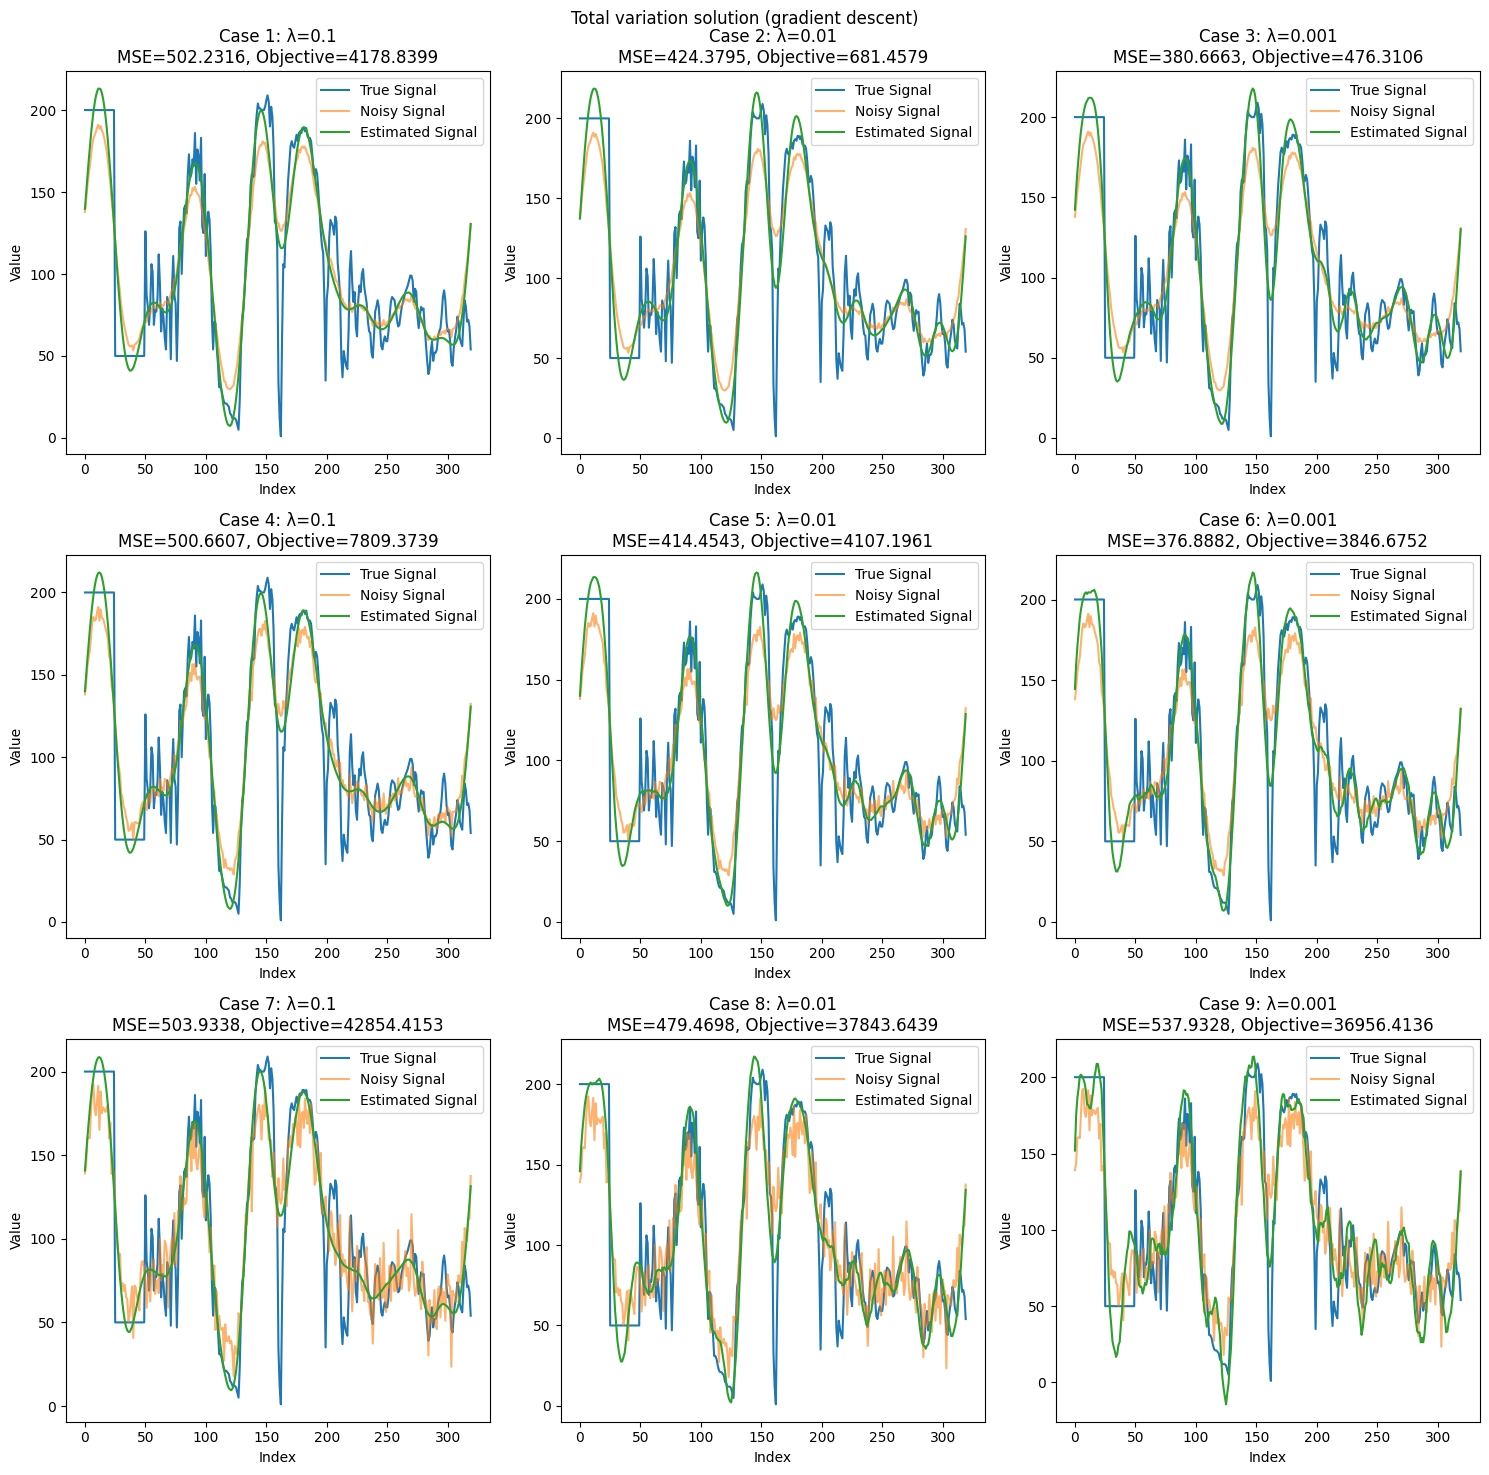

In [361]:
f0 = 0
n = 50
list_f_tv = []
list_L_tv = []
for lb in list_lb:
    list_f = []
    list_L = []
    for g in list_gn:
        f0 = np.zeros(A_psf.shape[1])
        f_tv, L_tv = solve_gradient_descent_ls(\
                    lambda f: objective_tv(f, A_psf, g, lb),\
                    lambda f: gradient_tv(f, A_psf, g, lb),\
                    f0, n)
        list_f.append(np.array(f_tv))
        list_L.append(np.array(L_tv))
    list_f_tv.append(np.array(list_f))
    list_L_tv.append(np.array(list_L))

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Total variation solution (gradient descent)')

for i, gn in enumerate(list_gn):
    for j, lambda_val in enumerate(list_lb):
        f_tv = list_f_tv[j][i]
        mse = mean_squared_error(f_tv, f_true)
        obj = objective_tikhonov(f_tv, A_psf, gn, D, lambda_val)
        axs[i, j].plot(f_true, label='True Signal')
        axs[i, j].plot(gn, label='Noisy Signal', alpha=0.6)
        axs[i, j].plot(f_tv, label='Estimated Signal')
        axs[i, j].legend()
        axs[i, j].set_title(f"Case {i * 3 + j + 1}: λ={lambda_val}\nMSE={mse:.4f}, Objective={obj:.4f}")
        axs[i, j].set_xlabel('Index')
        axs[i, j].set_ylabel('Value')
plt.tight_layout()
plt.show()


In [362]:
# This cell contains hidden tests.


### Optimization history
Display the result
* Plot the arrays in `list_L_tv` as solid lines in the same order of the parameter options in the subplots of `axs`
* Show the cases of the same noisy signal in the same subplots
* Make the subplots with log scaling on the y axis
* Show the legend in each subplot
* Show the case information in the titles to the subplots

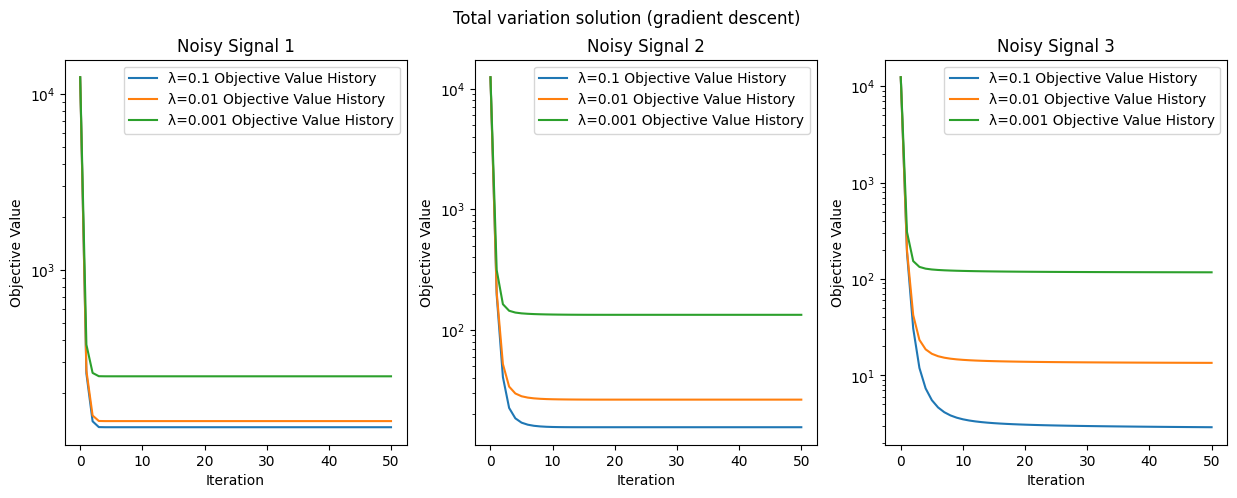

In [363]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Total variation solution (gradient descent)')

for j, g_prime in enumerate(list_gn):
    for i, lam in enumerate(list_lb):
        L_history = list_L_tv[j][i]
        
        axs[j].plot(L_history, label=f'λ={lam} Objective Value History')
        axs[j].set_yscale('log')
    
    axs[j].legend()
    axs[j].set_title(f"Noisy Signal {j + 1}")
    axs[j].set_xlabel('Iteration')
    axs[j].set_ylabel('Objective Value')

### Question: Convergence
* Is the gradient descent method convergent to the global solution?
* Where does the objective function with Tikhonov regularization convergent to?

YOUR ANSWER HERE

1. Is the gradient descent method convergent to the global solution?
-   Tikhonov regularization: The gradient descent method will converge to the global minimum, given the convexity of the objective function.
-   Total variation regularization: The gradient descent method may not converge to the global minimum. It often converges to local minima or saddle points due to the non-convex nature of the objective function.

2. Where does the objective function with Tikhonov regularization convergent to?
-   The gradient descent method converges to the global minimum of the convex objective function.
-   Optimal Solution: The function converges to the solution 
$\tilde f = (A^T A + \lambda D'^T D')^{-1} A^T g'$.
-   This solution is unique and minimizes the Tikhonov-regularized objective function.


### Total Variation

Total Variation (Gradient Magnitude - based regularization) produces a series of effects.
Could you replicate the following properties by varying the regularization parameter and letting the method converge until there is nearly no further change of the objective function: 

- sharper boundaries/edges: how would you measure that

- staircasing: how would you measure that

- sparsity in the signal: how would you measure that

YOUR ANSWER HERE

#### 1. Sharper Boundaries/Edges
-   Visual Inspection: Compare $f$ with the original signal for sharp transitions.
-   Edge Detection: Use algorithms like Sobel or Canny to quantify edge strength.
-   Total Variation Norm ($\|\nabla f\|_1$): Higher values indicate sharper edges.

#### 2. Staircasing
-   Visual Inspection: Look for step-like changes in $f$.
-   Total Variation Norm ($\|\nabla f\|_1$): Increased values suggest more staircasing.

#### 3. Sparsity in the Signal
-   Gradient Sparsity: Count non-zero elements in $\nabla f$ or compute $L_0$ or $L_1$ norms.
-   Percentage of Non-zero Gradients: Lower percentages indicate greater sparsity.

#### Approach
-   Parameter Variation: Iteratively adjust $\lambda$ to observe its impact on $f$.
-   Optimization: Use an optimization method to minimize $L(f) = \|Af - g\|_2^2 + \lambda\|\nabla f\|_1$.
-   Evaluation: Assess $f$'s characteristics for each $\lambda$ setting based on the described measurements.
